In [ ]:
#CS 513: Knowledge Discovery and Data 
#Group Members: Danica Lacuesta, Joelle An, and Raj Rana 
#Author: Danica Lacuesta
#20014543
#"I pledge my honor that I have abided by the Stevens Honor System"
#Purpose: This project analyzes digital activity patterns to classify user stress levels and identify the behavioral features that most strongly impact predictive accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("data/df_modified.csv")
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0


In [3]:
df["Stress_Binary"] = (df["Stress_Level(1-10)"] >= 6).astype(int)
df = df.drop("Stress_Level(1-10)", axis=1)
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube,Stress_Binary
0,44,3.1,7.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0,1
1,30,5.1,7.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0,1
2,23,7.4,6.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1,1
3,36,5.7,7.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0,1
4,34,7.0,4.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0,1


In [4]:
X = df.drop("Stress_Binary", axis=1)
y = df["Stress_Binary"]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [32]:
c50_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,            # allow deeper splits
    min_samples_split=5,    # smaller groups can split
    min_samples_leaf=3,
    random_state=42
)

c50_model.fit(X_train, y_train)
pred = c50_model.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

Accuracy: 0.8266666666666667

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.85      0.93      0.89       114

    accuracy                           0.83       150
   macro avg       0.77      0.71      0.74       150
weighted avg       0.82      0.83      0.82       150



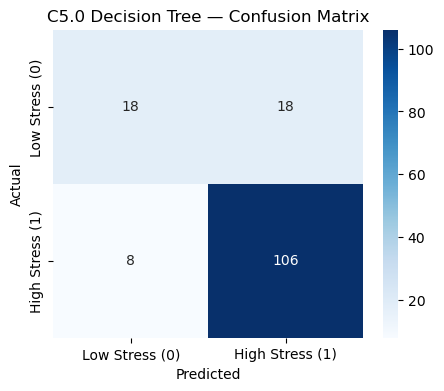

In [ ]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xticks([0.5, 1.5], ["Low Stress (0)", "High Stress (1)"])
plt.yticks([0.5, 1.5], ["Low Stress (0)", "High Stress (1)"])
plt.title("C5.0 Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

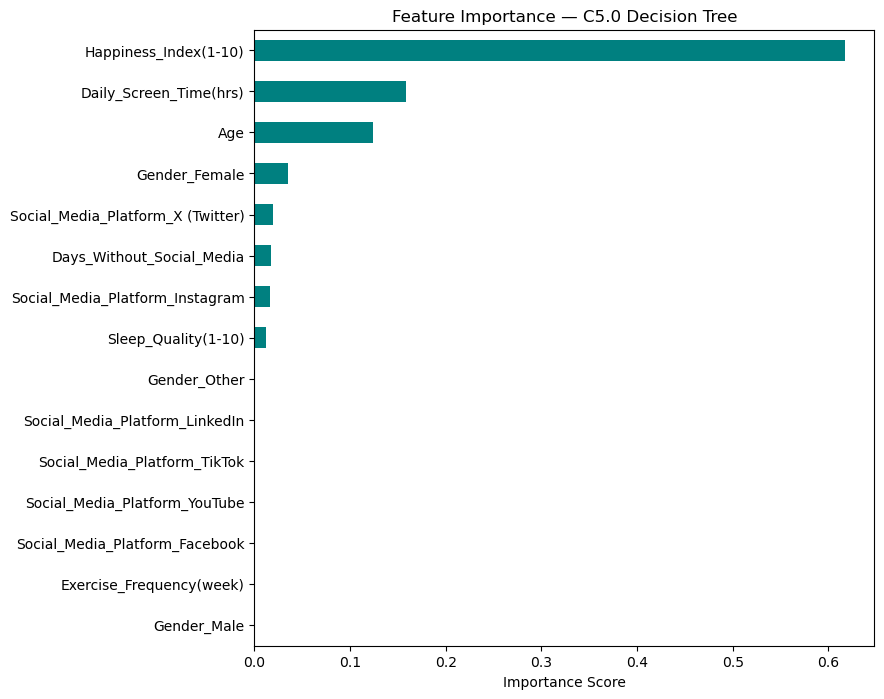

Gender_Male                          0.000000
Exercise_Frequency(week)             0.000000
Social_Media_Platform_Facebook       0.000000
Social_Media_Platform_YouTube        0.000000
Social_Media_Platform_TikTok         0.000000
Social_Media_Platform_LinkedIn       0.000000
Gender_Other                         0.000000
Sleep_Quality(1-10)                  0.012024
Social_Media_Platform_Instagram      0.015916
Days_Without_Social_Media            0.017375
Social_Media_Platform_X (Twitter)    0.019739
Gender_Female                        0.035410
Age                                  0.123599
Daily_Screen_Time(hrs)               0.158716
Happiness_Index(1-10)                0.617220
dtype: float64

In [ ]:
importances = pd.Series(c50_model.feature_importances_, index=X.columns)
importances = importances.sort_values()

plt.figure(figsize=(8,8))
importances.plot(kind="barh", color="teal")
plt.title("Feature Importance C5.0 Decision Tree")
plt.xlabel("Importance Score")
plt.show()

importances


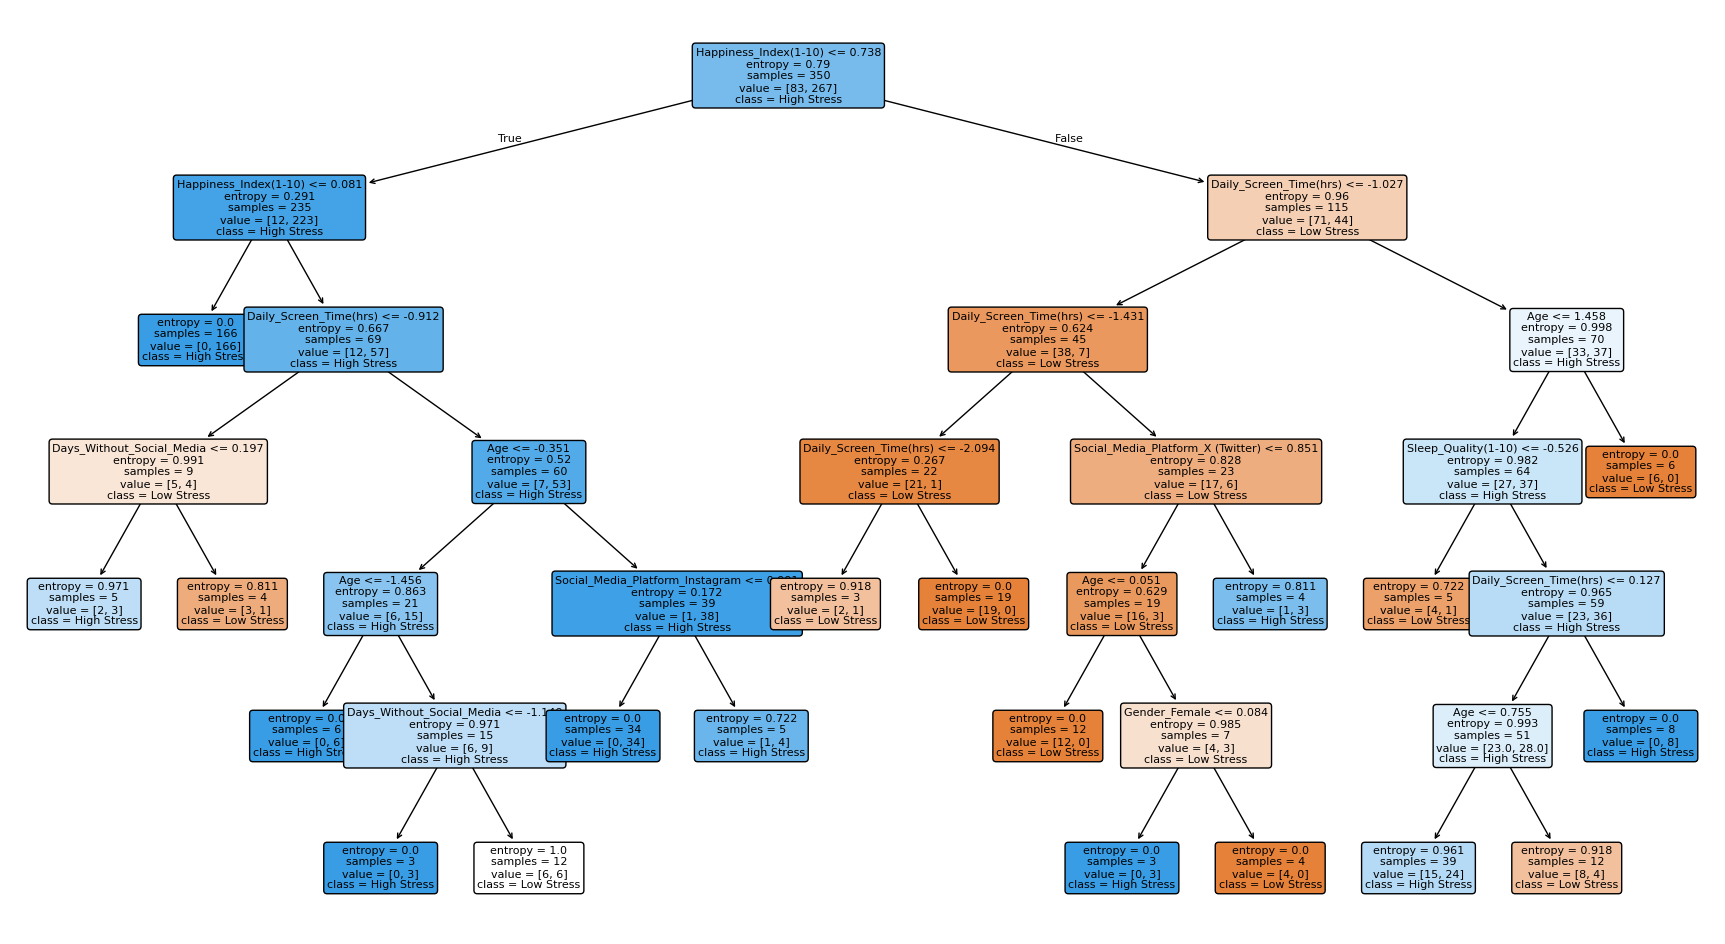

In [36]:
plt.figure(figsize=(22,12))
plot_tree(
    c50_model,
    feature_names=X.columns,
    class_names=["Low Stress", "High Stress"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()
